<a href="https://colab.research.google.com/github/bucks-hub/pytorch/blob/main/Iris_detection_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [41]:
# create a  model class that inherits nn.Module
class Model(nn.Module):
  #input layer with 4 features
  # -->Hidden layer 2 --> Hidden layer 2
  # -->output layer

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [42]:
#pich a seed  for randomisation
torch.manual_seed(41)

#create the instance of the model
model = Model()

In [43]:
from io import IncrementalNewlineDecoder
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [44]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv'
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
df['species'] = df['species'].replace('Iris-setosa', 0.0)
df['species'] = df['species'].replace('Iris-versicolor', 1.0)
df['species'] = df['species'].replace('Iris-virginica', 2.0)
df

<ipython-input-45-1434322cd033>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('Iris-virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [46]:
#train test split set x,y and convert it into numpz arrays
x = df.drop('species', axis=1).values
y = df['species'].values


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [48]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [49]:
#set the modle criterion to measure the error

criterion = nn.CrossEntropyLoss()
#Choose Adam optimizer, lr

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [50]:
# model training and epoch setting
epoch = 150
losses = []

for i  in range(epoch):
  # go forward and predict
  y_pred = model.forward(x_train)
  #calculate the loss
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy()) #track teh losses

  #print every 10 epoch
  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')
  #backprop is the process of feeding the error of fwd propagation to fine tune the network
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125856637954712
Epoch: 10 and loss: 1.0208169221878052
Epoch: 20 and loss: 0.8364942073822021
Epoch: 30 and loss: 0.5963050127029419
Epoch: 40 and loss: 0.4034278094768524
Epoch: 50 and loss: 0.27539265155792236
Epoch: 60 and loss: 0.1898188591003418
Epoch: 70 and loss: 0.13495659828186035
Epoch: 80 and loss: 0.10140730440616608
Epoch: 90 and loss: 0.08237124979496002
Epoch: 100 and loss: 0.07153056561946869
Epoch: 110 and loss: 0.06506683677434921
Epoch: 120 and loss: 0.06067163124680519
Epoch: 130 and loss: 0.057243093848228455
Epoch: 140 and loss: 0.054001908749341965


Text(0.5, 0, 'Epoch')

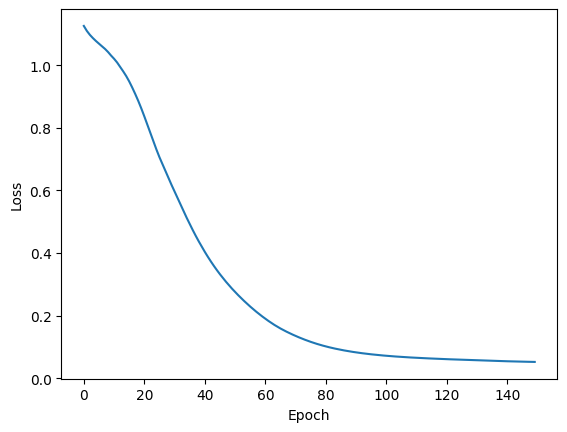

In [51]:
#let plot the losses
plt.plot(range(epoch), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')